In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
from misas.core import *

# Model Interpretation through Sensitivity Analysis for Segmentation

> Interpret and explain your segmetation models through analysing their sensitivity to defined alterations of the input

Input alterations currently include:
 - rotation
 - cropping

## Install

`pip install misas`

## How to use

Example with kaggle data

In [ ]:
from fastai.vision import *

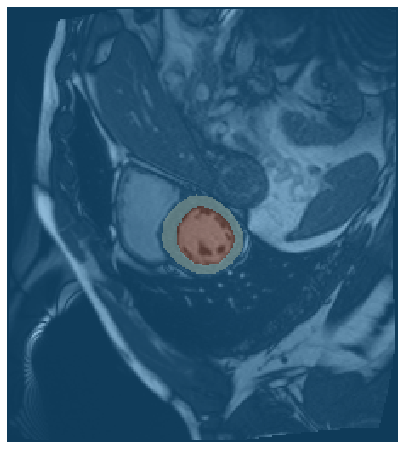

In [ ]:
img = lambda: open_image("example/kaggle/images/1-frame014-slice006.png")
trueMask = lambda: open_mask("example/kaggle/masks/1-frame014-slice006.png")
trainedModel = load_learner(path="example/kaggle", file="model.pkl", tfm_y=False)
img().show(y=trueMask(), figsize=(8,8))

### Rotation

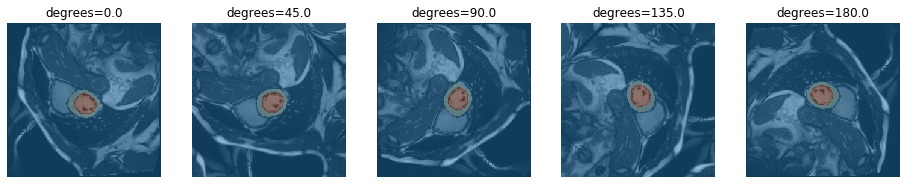

In [ ]:
plot_rotation_series(img, trainedModel)

[0, 360, 0, 1]

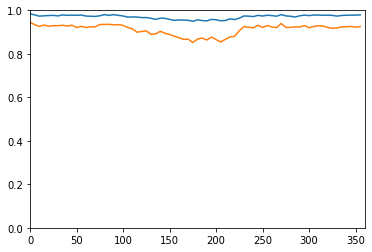

In [ ]:
results = rotation_series(img, trueMask, trainedModel)
plt.plot(results['deg'], results['diceLV'])
plt.plot(results['deg'], results['diceMY'])
plt.axis([0,360,0,1])

### Cropping

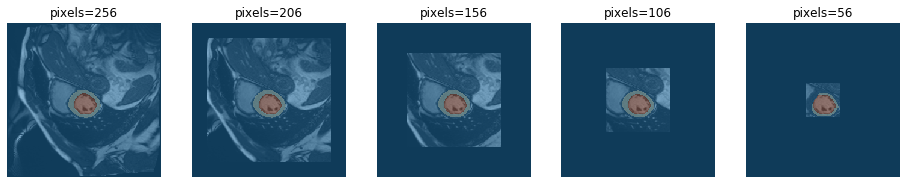

In [ ]:
plot_crop_series(img, trainedModel)

[32, 256, 0, 1]

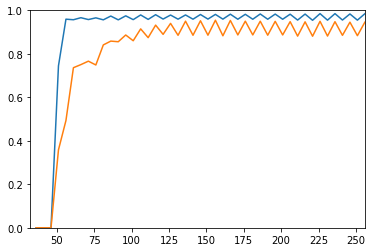

In [ ]:
results = crop_series(img, trueMask, trainedModel)
plt.plot(results['pxls'], results['diceLV'])
plt.plot(results['pxls'], results['diceMY'])
plt.axis([32,256,0,1])